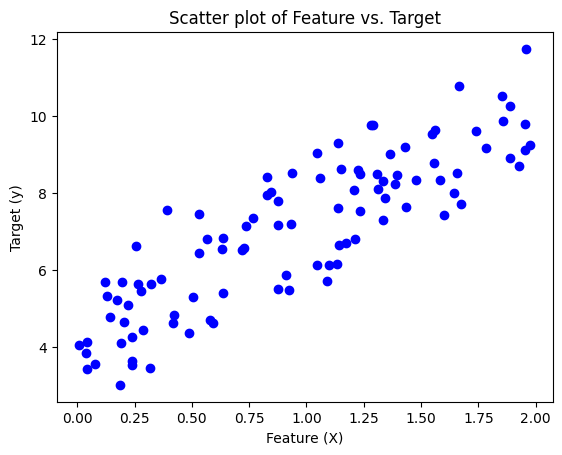

Slope (m): 2.968467510701019
Intercept (b): 4.222151077447231


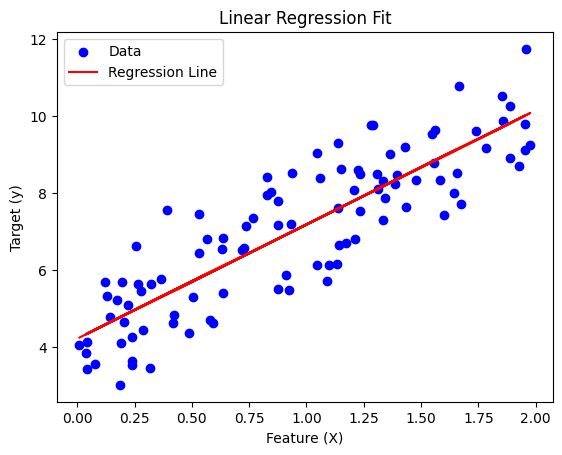

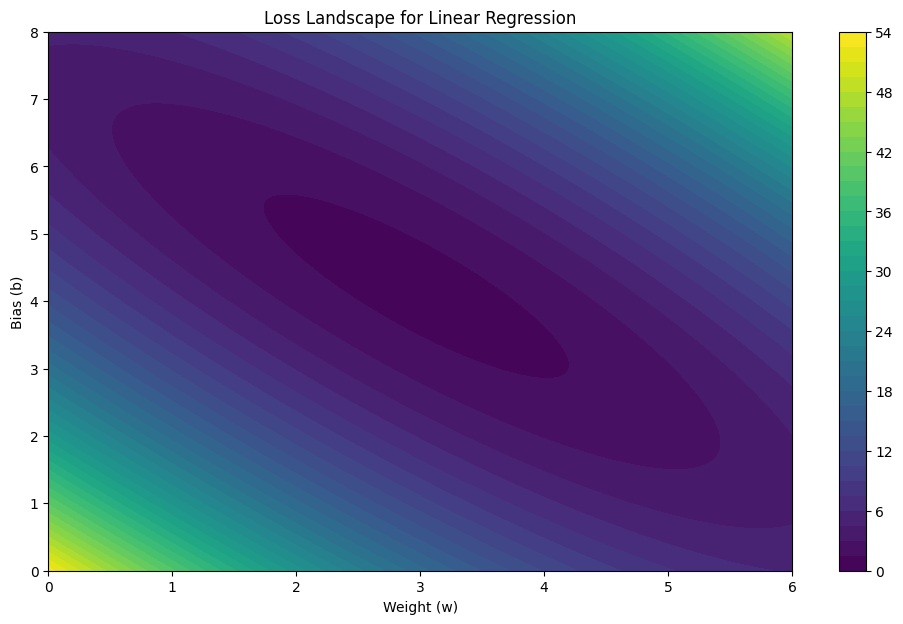

Iteration 10: w = 3.5187, b = 3.5654, loss = 1.1220
Iteration 20: w = 3.3782, b = 3.7602, loss = 1.0579
Iteration 30: w = 3.2639, b = 3.8892, loss = 1.0265
Iteration 40: w = 3.1815, b = 3.9821, loss = 1.0101
Iteration 50: w = 3.1220, b = 4.0491, loss = 1.0016
Iteration 60: w = 3.0792, b = 4.0974, loss = 0.9972
Iteration 70: w = 3.0483, b = 4.1322, loss = 0.9949
Iteration 80: w = 3.0260, b = 4.1573, loss = 0.9937
Iteration 90: w = 3.0099, b = 4.1754, loss = 0.9931
Iteration 100: w = 2.9984, b = 4.1884, loss = 0.9928


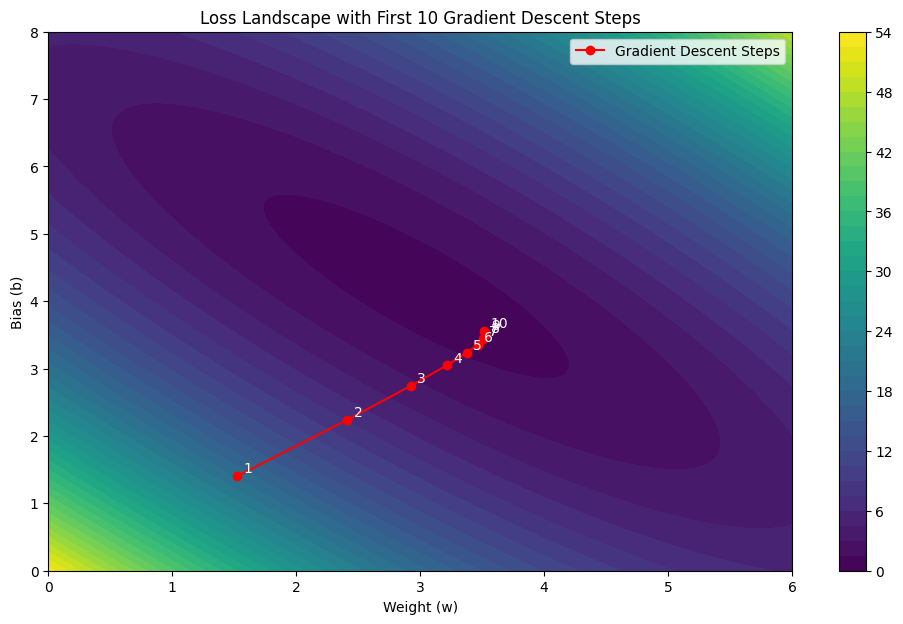

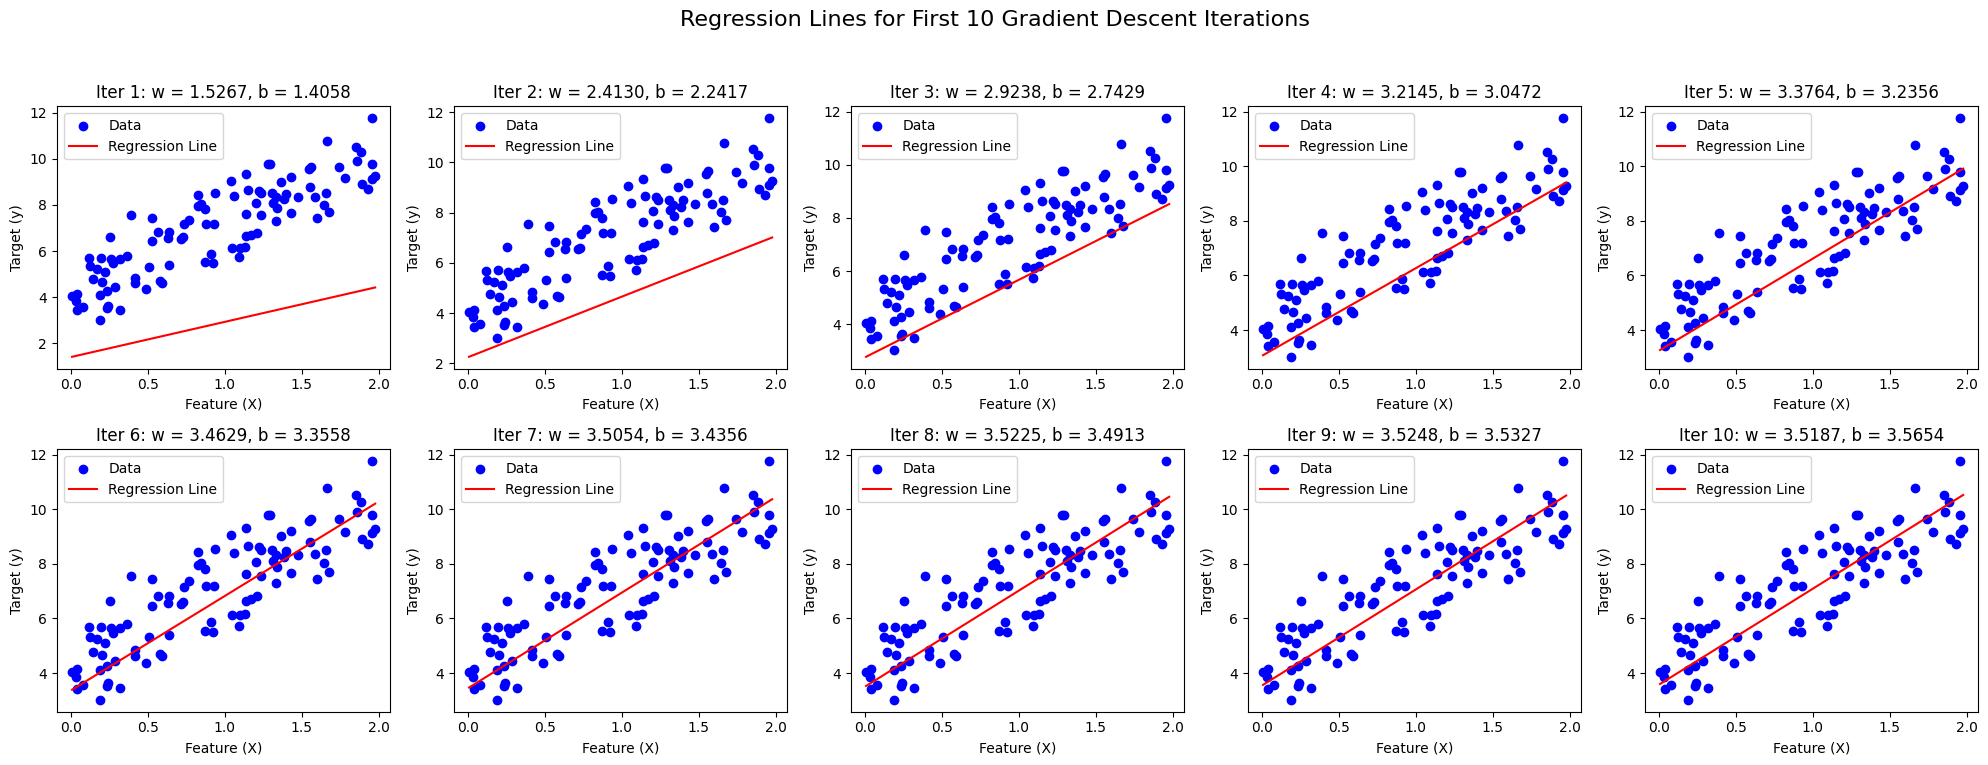


Detailed Information for the First 10 Gradient Descent Iterations:
 iteration        w        b         dw         db      loss
         1 1.526712 1.405819 -15.267116 -14.058195 53.330319
         2 2.413023 2.241747  -8.863114  -8.359276 19.152909
         3 2.923815 2.742872  -5.107916  -5.011251  7.373171
         4 3.214526 3.047173  -2.907119  -3.043004  3.308070
         5 3.376372 3.235634  -1.618455  -1.884616  1.900513
         6 3.462872 3.355796  -0.864999  -1.201615  1.408727
         7 3.505427 3.435566  -0.425550  -0.797705  1.232790
         8 3.522456 3.491335  -0.170293  -0.557685  1.166052
         9 3.524761 3.532729  -0.023049  -0.413943  1.137312
        10 3.518672 3.565409   0.060890  -0.326795  1.122025


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Generate the Data
np.random.seed(0)  # Ensuring our results are reproducible

# Generate some data that roughly follows a linear pattern
X = 2 * np.random.rand(100)  # 100 random data points from 0 to 2
y = 3 * X + 4 + np.random.randn(100)  # The equation: y = 3X + 4 with some random noise added

# Visualize the Data
plt.scatter(X, y, color='blue')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Scatter plot of Feature vs. Target')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# Plot the Linear Regression Line
# Predict the target using the slope and intercept
y_pred = slope * X + intercept

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Reshape X and y for computations
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Step 2: Define Ranges for Weight and Bias
w_values = np.linspace(0, 6, 400)
b_values = np.linspace(0, 8, 400)

# Create a meshgrid of weight and bias values
W, B = np.meshgrid(w_values, b_values)

# Step 3: Compute the Loss for Each Combination of w and b
Loss = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w = W[i, j]
        b = B[i, j]
        y_pred = w * X + b
        loss = np.mean((y - y_pred) ** 2)
        Loss[i, j] = loss

# Step 4: Visualize the Loss Landscape
plt.figure(figsize=(12, 7))
contour = plt.contourf(W, B, Loss, 50, cmap='viridis')
plt.colorbar(contour)
plt.title('Loss Landscape for Linear Regression')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.show()

# Step 5: Implement Gradient Descent with Detailed Tracking

# Initialize parameters
w = 0.0
b = 0.0

# Hyperparameters
learning_rate = 0.1  # Adjusted for faster convergence in first 10 iterations
n_iterations = 100

# To store the history of parameters
history = {'w': [], 'b': [], 'loss': [], 'dw': [], 'db': []}

# To store first 10 iterations' details
first_10_history = {'iteration': [], 'w': [], 'b': [], 'dw': [], 'db': [], 'loss': []}

# Gradient Descent Loop
for iteration in range(1, n_iterations + 1):
    # Compute predictions
    y_pred = w * X + b
    
    # Compute loss (MSE)
    loss = np.mean((y - y_pred) ** 2)
    
    # Compute gradients
    dw = (-2 / len(X)) * np.sum(X * (y - y_pred))
    db = (-2 / len(X)) * np.sum(y - y_pred)
    
    # Update parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    # Store the parameters and loss
    history['w'].append(w)
    history['b'].append(b)
    history['loss'].append(loss)
    history['dw'].append(dw)
    history['db'].append(db)
    
    # Store first 10 iterations' details
    if iteration <= 10:
        first_10_history['iteration'].append(iteration)
        first_10_history['w'].append(w)
        first_10_history['b'].append(b)
        first_10_history['dw'].append(dw)
        first_10_history['db'].append(db)
        first_10_history['loss'].append(loss)
    
    # (Optional) Print loss every 10 iterations
    if iteration % 10 == 0:
        print(f"Iteration {iteration}: w = {w:.4f}, b = {b:.4f}, loss = {loss:.4f}")

# Step 6: Plot the Loss Landscape with First 10 Gradient Descent Steps

plt.figure(figsize=(12, 7))
contour = plt.contourf(W, B, Loss, 50, cmap='viridis')
plt.colorbar(contour)
plt.title('Loss Landscape with First 10 Gradient Descent Steps')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')

# Extract first 10 positions
w_first10 = first_10_history['w']
b_first10 = first_10_history['b']

# Plot the first 10 steps
plt.plot(w_first10, b_first10, marker='o', color='red', label='Gradient Descent Steps')

# Annotate each step with iteration number
for i in range(len(w_first10)):
    plt.text(w_first10[i]+0.05, b_first10[i]+0.05, str(first_10_history['iteration'][i]), color='white')

plt.legend()
plt.show()

# Step 7: Plot Regression Lines for the First 10 Iterations

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]
    iteration = first_10_history['iteration'][i]
    w_iter = first_10_history['w'][i]
    b_iter = first_10_history['b'][i]
    
    # Compute current predictions
    y_pred_iter = w_iter * X + b_iter
    
    # Sort X for a clean line plot
    sorted_indices = X[:,0].argsort()
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred_iter[sorted_indices]
    
    # Plot data
    ax.scatter(X, y, color='blue', label='Data')
    
    # Plot regression line
    ax.plot(X_sorted, y_pred_sorted, color='red', label='Regression Line')
    
    # Set titles and labels
    ax.set_title(f'Iter {iteration}: w = {w_iter:.4f}, b = {b_iter:.4f}')
    ax.set_xlabel('Feature (X)')
    ax.set_ylabel('Target (y)')
    ax.legend()

plt.suptitle('Regression Lines for First 10 Gradient Descent Iterations', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Step 8: Print Detailed Information for the First 10 Iterations

# Create a DataFrame for better visualization
df = pd.DataFrame(first_10_history)
print("\nDetailed Information for the First 10 Gradient Descent Iterations:")
print(df.to_string(index=False))


Input (X) -----> [Neuron] -----> Output (ŷ)
      | (Weight w)
      |
   (Bias b)


Input Neuron (X):

    Represents the input feature from your dataset.
    In your linear regression model, this is the XX value.

Output Neuron (ŷ):

    Represents the predicted value based on the input and the learned parameters.
    In your linear regression model, this is y^=wX+by^​=wX+b.

Weight (w):

    Determines the influence of the input feature on the output.
    The line connecting the input neuron to the output neuron symbolizes this weight.

Bias (b):

    Allows the model to fit the data even when the input feature is zero.
    Represented as an additional input (often set to 1) with its own weight, but visually depicted here as a separate connection for clarity.

Iteration: The iteration number

w: Current slope (weight)

b: Current intercept (bias)

dw: Gradient of the loss with respect to ww

db: Gradient of the loss with respect to bb

loss: Current Mean Squared Error (MSE)